In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
%load_ext autoreload
%autoreload 2

import nnqst
from nnqst import rbm_qst, rbm_classic, utils, paper_functions, \
    generators, state_operations, state_representations, fidelities

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Research

## RBM QST

In [11]:
num_units = 2
num_hidd = 5
num_samples = 3000

# thetas = utils.random_phases(2**num_units)
thetas = [1.4,0.9,1.2,0.7]
print("Thetas:", thetas)

# quantum_system = [(0,0,1),
#                  (0,1,0),
#                  (1,0,0)]

amplitudes, phases = {}, {}

states = generators.get_all_states(num_units)
quantum_system = states

for i in range(len(states)):
    state = states[i,]
    amplitudes[tuple(state)] = 1. / np.sqrt(len(states))
    phases[tuple(state)] = thetas[i]

print(amplitudes)
main_basis = state_operations.U_ZZ(num_units)

ising_basis_set = generators.generate_Isinglike_basis_set(num_units)

dataset = generators.generate_dataset(states, ising_basis_set, amplitudes, phases, num_units, num_samples)

psi_true = {}
for state in states:
    psi_true[tuple(state)] = amplitudes[tuple(state)]*np.exp(1j * phases[tuple(state)])
print('psi_true', psi_true)    

Thetas: [1.4, 0.9, 1.2, 0.7]
{(0, 0): 0.5, (0, 1): 0.5, (1, 0): 0.5, (1, 1): 0.5}
qdict= {(0, 1): (0.4901848604918773+0.5047132324447905j), (0, 0): (0.18820527236482465+0.6779346723058147j), (1, 0): (-0.06802035304116127+0.018883514287477587j), (1, 1): (-0.05064023667453582+0.04918253723870483j)}
qdict= {(0, 1): (-0.15967985224683906+0.0714612084548985j), (0, 0): (0.27986477157050244+0.6253569781383939j), (1, 0): (0.39852536128619953+0.5572909266122114j), (1, 1): (-0.1422997358802136+0.10176023140612575j)}
qdict= {(0, 1): (0.44753765951171354+0.00653533625854108j), (0, 0): (0.38961803867100026+0.2202962805936532j), (1, 0): (-0.2694331193473369+0.4765219059996391j), (1, 1): (-0.00799303569437207+0.5473604334249542j)}
qdict= {(0, 1): (-0.21685542517991596+0.5681814052053169j), (0, 0): (0.33704034450357934+0.1286367813879754j), (1, 0): (0.3558781603060358+0.059113030425962j), (1, 1): (-0.09965253490004986+0.5999381275923752j)}
psi_true {(0, 0): (0.0849835714501205+0.49272486499423007j), (

In [12]:
dataset

{'HI': {(0, 0): 1491, (0, 1): 1469, (1, 0): 20, (1, 1): 20},
 'IH': {(0, 0): 1374, (0, 1): 98, (1, 0): 1426, (1, 1): 102},
 'IK': {(0, 0): 397, (0, 1): 1144, (1, 0): 365, (1, 1): 1094},
 'KI': {(0, 0): 600, (0, 1): 605, (1, 0): 912, (1, 1): 883}}

In [13]:
len(dataset)

4

## (1/2) Amplitudes.

In [14]:
dataset_Z = generators.generate_dataset(states, ['I' * num_units], amplitudes, phases, num_units, num_samples)

r_qst = rbm_qst.RBM_QST(quantum_system, num_units, num_hidd)
r_qst.train_amplitudes(dataset_Z, max_epochs=5000, learning_rate=0.9, debug=True, precise=True)

qdict= {(0, 1): (0.31080498413533225+0.39166345481374165j), (1, 0): (0.1811788772383368+0.46601954298361314j), (0, 0): (0.0849835714501205+0.49272486499423007j), (1, 1): (0.38242109364224425+0.3221088436188455j)}
Epoch 0: objective is 1.3866628458303598
Epoch 500: objective is 1.386168992015908
Epoch 1000: objective is 1.3861689452623736
Epoch 1500: objective is 1.3861689035004376
Epoch 2000: objective is 1.3861688660558809
Epoch 2500: objective is 1.386168832376756
Epoch 3000: objective is 1.3861688020065073
Epoch 3500: objective is 1.386168774563647
Epoch 4000: objective is 1.3861687497262394
Epoch 4500: objective is 1.3861687272199654


In [15]:
basis_set = generators.generate_Isinglike_basis_set(num_units)
basis_set

['HI', 'IH', 'KI', 'IK']

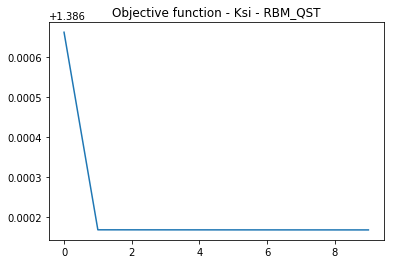

In [16]:
plt.plot(r_qst.objectives)
plt.title('Objective function - Ksi - RBM_QST')
plt.show()

In [21]:
# Fidelity.
fid, states = fidelities.fidelity_RBM(r_qst,
                                      state_representations.into_dict(generators.ideal_w(num_units)),
                                      num_samples=2000)
fid

0.49147850872456794

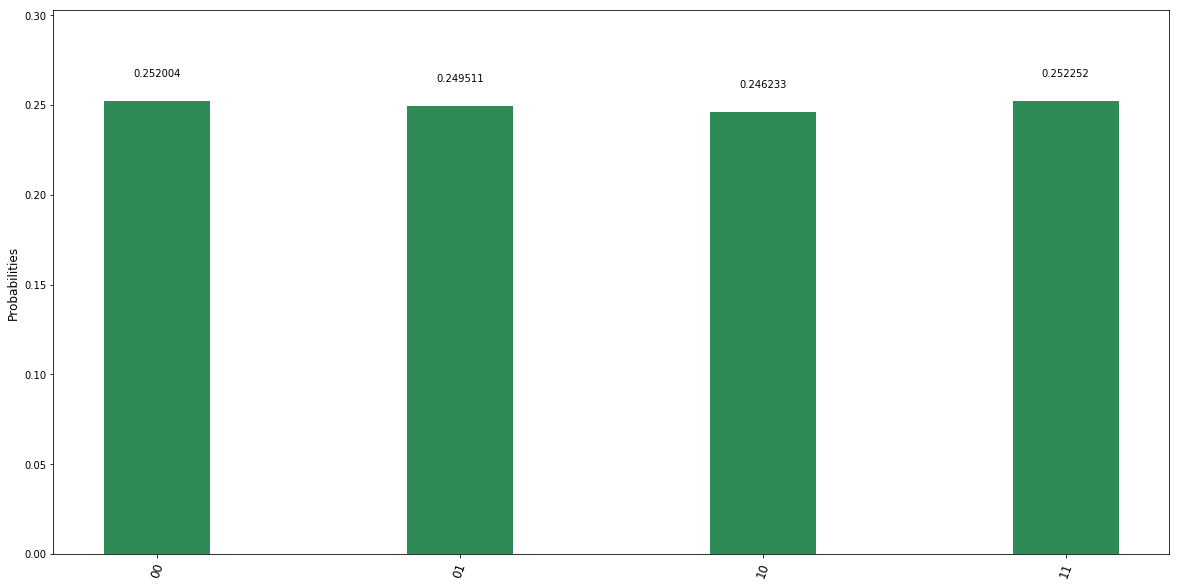

In [22]:
utils.plot_histogram(states)

In [23]:
print(r_qst.weights_lambda)

[[ 0.00000000e+00  5.75615194e-05 -7.14046988e-04 -1.14676451e-04
  -4.53426140e-05  5.41611192e-04]
 [-2.67099539e-02 -5.06499232e-02  5.38713475e-02  4.64382459e-02
   1.02253843e-02 -6.87634196e-02]
 [ 9.27717182e-03 -6.88779110e-02 -6.36191708e-02  8.10335822e-02
   2.50913944e-02  2.70709492e-02]]


## (2/2) Phases.

In [24]:
dataset

{'HI': {(0, 0): 1491, (0, 1): 1469, (1, 0): 20, (1, 1): 20},
 'IH': {(0, 0): 1374, (0, 1): 98, (1, 0): 1426, (1, 1): 102},
 'IK': {(0, 0): 397, (0, 1): 1144, (1, 0): 365, (1, 1): 1094},
 'KI': {(0, 0): 600, (0, 1): 605, (1, 0): 912, (1, 1): 883}}

In [25]:
basis_set = generators.generate_Isinglike_basis_set(num_units)
print(basis_set)
print(dataset)
r_qst.train_phases(dataset, basis_set=basis_set, max_epochs=1000, learning_rate=0.01, debug=True, precise=True)

['HI', 'IH', 'KI', 'IK']
{'HI': {(0, 0): 1491, (0, 1): 1469, (1, 0): 20, (1, 1): 20}, 'IH': {(0, 0): 1374, (1, 0): 1426, (1, 1): 102, (0, 1): 98}, 'KI': {(1, 1): 883, (1, 0): 912, (0, 0): 600, (0, 1): 605}, 'IK': {(0, 1): 1144, (1, 0): 365, (1, 1): 1094, (0, 0): 397}}
Epoch 0: objective is 1.1854976443174232
Epoch 500: objective is 1.082435877833066


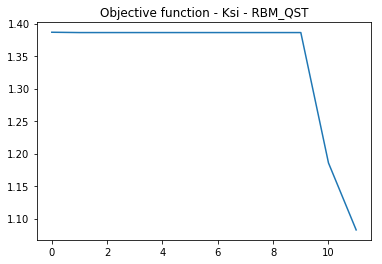

In [26]:
plt.plot(r_qst.objectives)
plt.title('Objective function - Ksi - RBM_QST')
plt.show()

In [27]:
# Fidelity.of W state
#fid, states = utils.fidelity_RBM(r_qst, utils.into_dict(utils.ideal_w(num_units)), num_samples=2000)
#fid

In [28]:
# Fidelity.
fid = fidelities.fidelity_RBM_PRECISE(r_qst, psi_true)
fid

0.9997287250867809

In [29]:
r_qst.weights_mu

array([[ 0.00000000e+00,  1.03192275e-02,  4.60344365e-03,
        -1.14941647e-02, -3.36001827e-03,  2.90843375e-04],
       [-1.96285247e-01, -1.78000523e-01, -7.79042399e-03,
        -4.64234494e-02, -1.54253301e-01, -1.56241012e-01],
       [-4.55711625e-01, -2.73913437e-01, -2.61813284e-01,
        -2.36817540e-01, -2.44266693e-01, -2.63226959e-01]])

In [30]:
#Phases
psi_rbm_lst = list(utils.psi_RBM(r_qst).values())
psi_true_lst = list(psi_true)
print(psi_true_lst)
phases_RBM = np.log(psi_rbm_lst).imag
phases_true = np.array(list(phases.values()))
print(phases_RBM%np.pi)
print(phases_true%np.pi)
print(np.array(phases_true - phases_RBM)%(2*np.pi))

[(0, 0), (0, 1), (1, 0), (1, 1)]
[1.73297473 1.20552112 1.50417301 0.99407824]
[1.4 0.9 1.2 0.7]
[5.95021057 5.97766418 5.9790123  5.98910707]


[1. 1. 1. 1.]


<Container object of 4 artists>

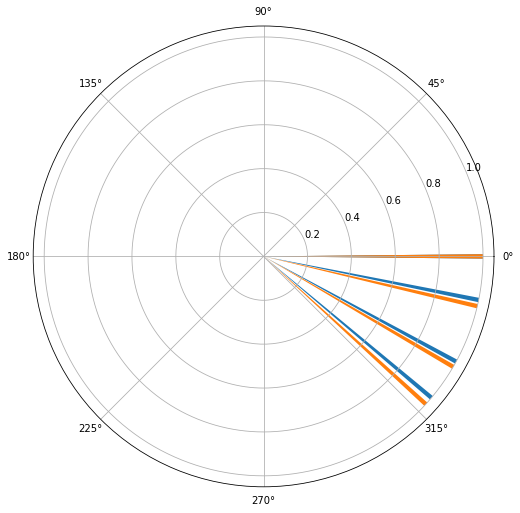

In [31]:
radii = np.ones(4)
print(radii)
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
ax.bar(phases_true - phases_true[0], radii, width=0.02, bottom=0.0)
ax.bar(phases_RBM - phases_RBM[0], radii, width=0.02, bottom=0.0)

## Classical RBM

In [81]:
r_cl = rbm_classic.RBM(num_units, 3)

In [82]:
r_cl.train(dataset["HKI"], max_epochs=3000, learning_rate=0.5, debug=True)

Epoch 0: objective is 2.089235221956695
Epoch 100: objective is 1.9282714474847888
Epoch 200: objective is 1.880321053809958
Epoch 300: objective is 1.8590352591004402
Epoch 400: objective is 1.8543552339022467
Epoch 500: objective is 1.858505210183757
Epoch 600: objective is 1.8824382593912625
Epoch 700: objective is 1.9005059691984265
Epoch 800: objective is 1.9009042524892807
Epoch 900: objective is 1.8738001551263623
Epoch 1000: objective is 1.8566430737322874
Epoch 1100: objective is 1.8667577187508575
Epoch 1200: objective is 1.8922337211414104
Epoch 1300: objective is 1.928856763024546
Epoch 1400: objective is 1.9603492196362116
Epoch 1500: objective is 1.961918595710036
Epoch 1600: objective is 1.944586230598168
Epoch 1700: objective is 1.9350972854077664
Epoch 1800: objective is 1.9264164316605117
Epoch 1900: objective is 1.921769329139505
Epoch 2000: objective is 1.9163706052034473
Epoch 2100: objective is 1.9132528472812542
Epoch 2200: objective is 1.9106768686989328
Epoch 2

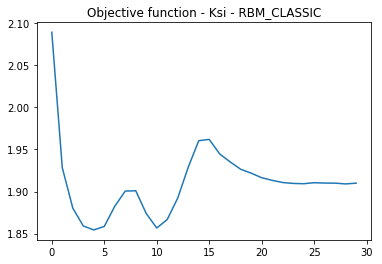

In [83]:
plt.plot(r_cl.objectives)
plt.title('Objective function - Ksi - RBM_CLASSIC')
plt.show()

In [321]:
# Fidelity.
fid, states = utils.fidelity_RBM(r_qst, utils.into_dict(quantum_system), num_samples=2000)
fid

0.9991310324822074

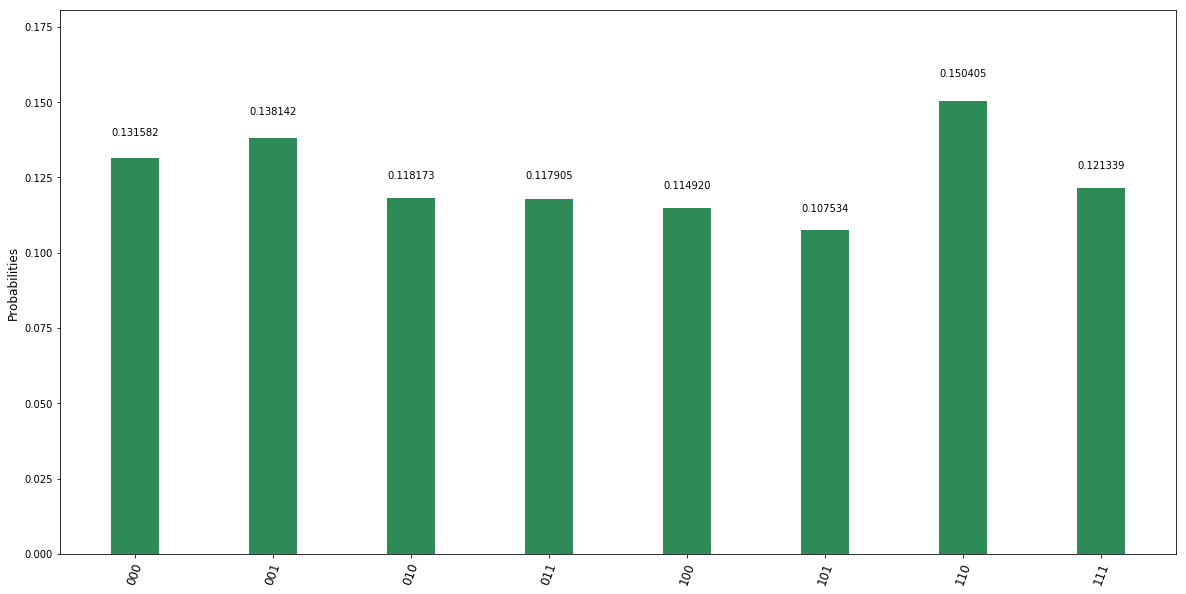

In [85]:
utils.plot_histogram(states)

# Plot Fig.1 b

In [19]:
import tqdm

num_units = 3
fidelities = list()
N_samples = [50, 100, 500, 1000]

for N_s in tqdm.tqdm(N_samples):
    dataset = utils.dataset_w(num_units, N_s)
    
    r_cl = rbm_classic.RBM(num_units, num_units, debug_print=False)
    r_cl.train(dataset, max_epochs=10000, learning_rate=0.3)

    fidelities.append(utils.fidelity_RBM(r_cl, utils.into_dict(utils.ideal_w(num_units)))[0])

overlaps = list(map(lambda x: np.sqrt(x), fidelities))

100%|██████████| 4/4 [00:08<00:00,  2.27s/it]


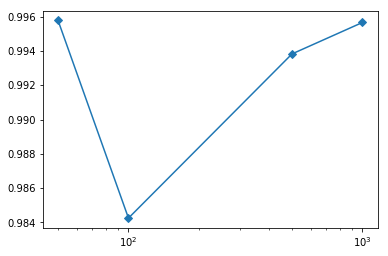

In [20]:
plt.semilogx(N_samples, overlaps, '.-', marker='D')
plt.show()

In [48]:
import tqdm

num_units = 5
fidelities = list()
N_samples = [50, 100, 500, 1000]

for N_s in tqdm.tqdm(N_samples):
    dataset = utils.dataset_w(num_units, N_s)
    
    r_qst = rbm_qst.RBM_QST(num_units, num_units)
    r_qst.train(dataset, dataset, max_epochs=3000, learning_rate=0.5)

    fid, states = utils.fidelity_RBM(r_qst, utils.into_dict(utils.ideal_w(num_units)))
    fidelities.append(fid)
    print(fidelities[-1])

overlaps = list(map(lambda x: np.sqrt(x), fidelities))


 25%|██▌       | 1/4 [00:12<00:37, 12.63s/it]

0.298996136808


 50%|█████     | 2/4 [00:24<00:25, 12.55s/it]

0.913126897567


 75%|███████▌  | 3/4 [00:36<00:12, 12.32s/it]

0.96150806699


100%|██████████| 4/4 [00:49<00:00, 12.35s/it]

0.948565339316


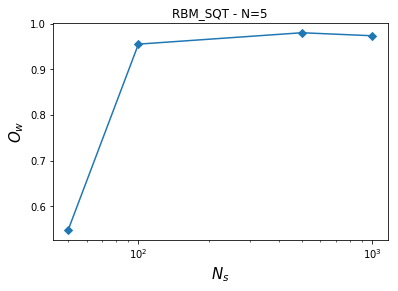

In [49]:
plt.semilogx(N_samples, overlaps, '.-', marker='D')
plt.title('RBM_SQT - N={}'.format(num_units))
plt.xlabel('$N_s$', fontsize=15)
plt.ylabel('$O_w$', fontsize=15)
plt.show()

In [81]:
basis = 'IHIK'

In [82]:
a = [2,3,0,1]

In [86]:
basis.find('J')

-1

In [85]:
a

[2, 3, 0, 8]

In [67]:
(basis=='I').any()

AttributeError: 'bool' object has no attribute 'any'

In [83]:
a

[2, 3, 0, 1]